In [72]:
from sklearn.datasets import load_digits

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Import the sequential model and dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

The goal of this notebook is to build a model on the digits dataset, a sample dataset that comes pre-loaded with scikit learn. The digits dataset consist of 8x8 pixel handwritten digits, each with a class that ranges from 0 to 9.

Here, we want to distinguish between each of the 10 possible digits given an image, so we are dealing with multi-class classification.

In [73]:
# load dataset
digits = load_digits()
digits_data = digits['data']
digits_target = digits['target']

In [74]:
print(f'8x8 Pixel Data:\n{digits_data}')
print(f'8x8 Pixel Dataset Length: {len(digits_data)}')
print(f'First row of 8x8 Pixel Dataset: {(digits_data[0])}')
print()
print(f'Target Variable:\n {digits_target}')
print(f'Target Variable Dataset Length: {len(digits_target)}')
print(f'First row of Target Variable Dataset: {(digits_target[0])}')

8x8 Pixel Data:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
8x8 Pixel Dataset Length: 1797
First row of 8x8 Pixel Dataset: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

Target Variable:
 [0 1 2 ... 8 9 8]
Target Variable Dataset Length: 1797
First row of Target Variable Dataset: 0


We'll apply one-hot encoding to the target variable as this will give us binary columns for each class.

In [75]:
print(f'Current target variable dataset shape: {digits_target.shape}')
print(f'First 10 entries:\n {digits_target[:10]}')
print()
# reshape target variable to a 2d array
digits_target_reshaped = digits_target.reshape(-1, 1)
print(f'Target variable dataset shape after reshape: {digits_target_reshaped.shape}')
print(f'First 10 entries after reshape:\n {digits_target_reshaped[:10]}')

Current target variable dataset shape: (1797,)
First 10 entries:
 [0 1 2 3 4 5 6 7 8 9]

Target variable dataset shape after reshape: (1797, 1)
First 10 entries after reshape:
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [76]:
# initialize onehotencoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# fit and transform the target variable
digits_target_onehot = onehot_encoder.fit_transform(digits_target_reshaped)
print(f'Target Variable shape after one-hot encoding: {digits_target_onehot.shape}')
print(f'First 5 entries after one-hot encoding:\n {digits_target_onehot[:5]}')

Target Variable shape after one-hot encoding: (1797, 10)
First 5 entries after one-hot encoding:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [77]:
digits_target_onehot.shape

(1797, 10)

In [84]:
# instantiate sequential model
model = Sequential()

# add an input shape that takes the total no of pixels for each 8x8 image
model.add(Input(shape=(64,)))

# add a dense layer of 16 neurons with `relu` activation
model.add(Dense(16, activation='relu'))

# add dense layer of 10 neurons (one per target class) and softmax
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
X = digits_data
y = digits_target_onehot

# split data
X_train_val, X_test, y_train_val, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=42)

# further split X_train_val into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, 
                                                  y_train_val,
                                                  test_size=0.2,
                                                  random_state=42)


h_callback = model.fit(X_train,
                       y_train,
                       epochs=60,
                       validation_data=[X_val, y_val],
                       verbose=1)

# evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test,
                                        y_test)
print(f'Test accuracy: {test_accuracy: .4f}')


Epoch 1/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1428 - loss: 7.2828 - val_accuracy: 0.2049 - val_loss: 4.0448
Epoch 2/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2687 - loss: 3.3739 - val_accuracy: 0.4062 - val_loss: 2.2981
Epoch 3/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3975 - loss: 2.0474 - val_accuracy: 0.5139 - val_loss: 1.5886
Epoch 4/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5151 - loss: 1.4741 - val_accuracy: 0.5833 - val_loss: 1.2324
Epoch 5/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5958 - loss: 1.1633 - val_accuracy: 0.6424 - val_loss: 1.0150
Epoch 6/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6912 - loss: 0.9115 - val_accuracy: 0.7118 - val_loss: 0.8644
Epoch 7/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7489 - loss: 0.7156 - val_accuracy: 0.7396 - val_loss: 0.7246
Epoch 8/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7954 - loss: 0.6102 - val_accuracy: 0.7917 - val_loss:

Below we'll plot the model's learning curve to check out if it's overfitting.

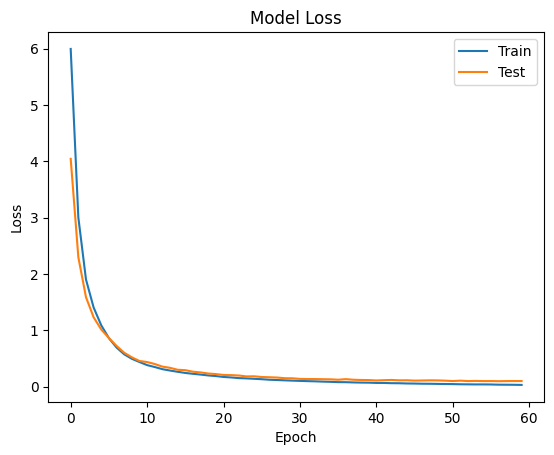

In [86]:
# helper function to plot the learning curves
def plot_loss(loss, val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

The performances of the model on the training and datasets are very similar. If the training set had a significantly better performance, we could say that the model overfitted. But since we see not much deviation across performances, we conclude that there is no overfitting.